In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [20]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [21]:
# Create an endpoint URL for a city.
#url="http://api.openweathermap.org/data/2.5/weather?"
#city='London'


In [32]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [33]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [23]:
#query_url=url+'appid=' + weather_api_key + '&q=' +city

In [24]:
#weather_response=requests.get(query_url)
#weather_json=weather_response.json()

In [25]:
#weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [26]:
#weather_json.get('main')

{'temp': 287.57,
 'feels_like': 286.97,
 'temp_min': 285.64,
 'temp_max': 289.6,
 'pressure': 1022,
 'humidity': 73}

In [34]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [35]:
city_weather.status_code

200

In [36]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [37]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [38]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":62.51,"feels_like":61.79,"temp_min":55.62,"temp_max":67.96,"pressure":1017,"humidity":71},"visibility":10000,"wind":{"speed":3,"deg":322,"gust":5.99},"clouds":{"all":4},"dt":1656918396,"sys":{"type":2,"id":2001997,"country":"US","sunrise":1656925963,"sunset":1656980654},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [39]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 62.51,
  'feels_like': 61.79,
  'temp_min': 55.62,
  'temp_max': 67.96,
  'pressure': 1017,
  'humidity': 71},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 322, 'gust': 5.99},
 'clouds': {'all': 4},
 'dt': 1656918396,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1656925963,
  'sunset': 1656980654},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [40]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [41]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [42]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 62.51,
  'feels_like': 61.79,
  'temp_min': 55.62,
  'temp_max': 67.96,
  'pressure': 1017,
  'humidity': 71},
 'visibility': 10000,
 'wind': {'speed': 3, 'deg': 322, 'gust': 5.99},
 'clouds': {'all': 4},
 'dt': 1656918396,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1656925963,
  'sunset': 1656980654},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [45]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data['sys']['country']

'US'

In [46]:
boston_data['dt']

1656918396

In [47]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 67.96 71 4 3


In [48]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [49]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
## Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"{city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | comodoro rivadavia
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | puerto leguizamo
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | azad shahr
Processing Record 7 of Set 1 | omalur
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | matara
Processing Record 11 of Set 1 | nakamura
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | kresek
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | xuddur
Processing Record 22 of Set 1 | kawalu
Processing Record

In [50]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Comodoro Rivadavia,-45.8667,-67.5000,44.46,61,0,25.32,AR,2022-07-04 07:36:04
1,Esperance,-33.8667,121.9000,60.53,45,0,11.48,AU,2022-07-04 07:36:04
2,Ribeira Grande,38.5167,-28.7000,64.80,68,40,11.50,PT,2022-07-04 07:36:05
3,Puerto Leguizamo,-0.1934,-74.7819,70.32,100,100,2.30,CO,2022-07-04 07:36:05
4,Port Alfred,-33.5906,26.8910,60.19,80,78,1.01,ZA,2022-07-04 07:36:06
5,Azad Shahr,34.7909,48.5707,72.09,33,0,4.61,IR,2022-07-04 07:36:06
6,Omalur,11.7410,78.0456,86.25,54,75,4.61,IN,2022-07-04 07:36:06
7,Arraial Do Cabo,-22.9661,-42.0278,69.66,90,0,21.34,BR,2022-07-04 07:36:07
8,Mataura,-46.1927,168.8643,45.48,74,100,5.99,NZ,2022-07-04 07:36:07
9,Matara,5.9485,80.5353,86.04,61,95,17.29,LK,2022-07-04 07:36:08


In [52]:
new_col=['City','Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_col]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Comodoro Rivadavia,AR,2022-07-04 07:36:04,-45.8667,-67.5000,44.46,61,0,25.32
1,Esperance,AU,2022-07-04 07:36:04,-33.8667,121.9000,60.53,45,0,11.48
2,Ribeira Grande,PT,2022-07-04 07:36:05,38.5167,-28.7000,64.80,68,40,11.50
3,Puerto Leguizamo,CO,2022-07-04 07:36:05,-0.1934,-74.7819,70.32,100,100,2.30
4,Port Alfred,ZA,2022-07-04 07:36:06,-33.5906,26.8910,60.19,80,78,1.01


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data\cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [56]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [57]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1656922116.2896752

In [59]:
today=time.strftime('%x')
today

'07/04/22'

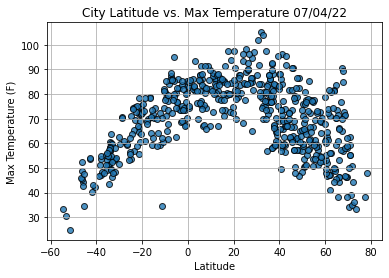

In [61]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data\Fig1.png")

# Show plot.
plt.show()

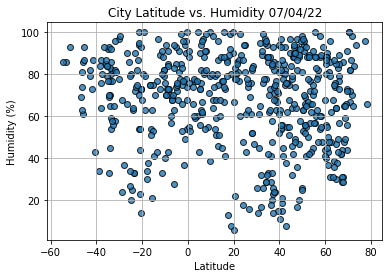

In [62]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

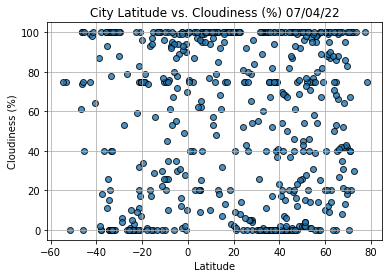

In [63]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

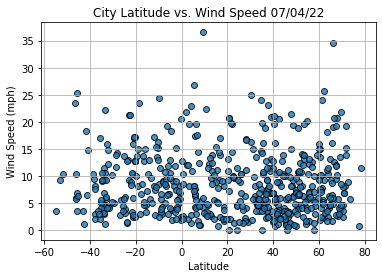

In [64]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()